In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
pas = pd.read_csv('../input/AirPassengers.csv')
pas.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [27]:
def ano():
    anos = []
    for i in pas['Month']:
        anos.append(int(i[:4]))
    return anos

def mes():
    meses = []
    for i in pas['Month']:
        meses.append(int(i[5:]))
    return meses

anos = ano()
meses = mes()

In [28]:
datas = pd.DataFrame({'mes': meses, 'ano': anos})

In [29]:
pas_cl = datas.join(pas['#Passengers'])
pas_cl.head()

,mes,ano,#Passengers
0,1,1949,112
1,2,1949,118
2,3,1949,132
3,4,1949,129
4,5,1949,121


In [30]:
porAno = pas_cl.groupby('ano').describe()['#Passengers']
porAno

,count,mean,std,min,25%,50%,75%,max
ano,,,,,,,,
1949,12.0,126.666667,13.720147,104.0,118.00,125.0,135.25,148.0
1950,12.0,139.666667,19.070841,114.0,125.75,137.5,151.25,170.0
1951,12.0,170.166667,18.438267,145.0,159.00,169.0,179.50,199.0
1952,12.0,197.000000,22.966379,171.0,180.75,192.0,211.25,242.0
1953,12.0,225.000000,28.466887,180.0,199.75,232.0,238.50,272.0
1954,12.0,238.916667,34.924486,188.0,221.25,231.5,260.25,302.0
1955,12.0,284.000000,42.140458,233.0,260.75,272.0,312.75,364.0
1956,12.0,328.250000,47.861780,271.0,300.50,315.0,359.75,413.0
1957,12.0,368.416667,57.890898,301.0,330.75,351.5,408.50,467.0


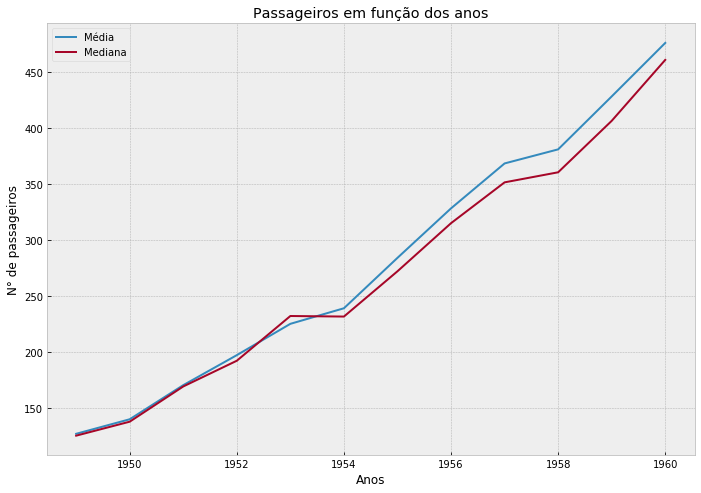

In [31]:
plt.style.use('bmh')

fig = plt.figure()

ax1 = fig.add_axes([1.0,1.0,1.5,1.5])

ax1.plot(porAno.index ,porAno['mean'], label= 'Média')
ax1.plot(porAno.index ,porAno['50%'], label= 'Mediana')

ax1.set_xlabel('Anos')
ax1.set_ylabel('N° de passageiros')


ax1.set_title('Passageiros em função dos anos')
ax1.legend()

[Text(0, 0, '1949'),
 Text(0, 0, '1950'),
 Text(0, 0, '1951'),
 Text(0, 0, '1952'),
 Text(0, 0, '1953'),
 Text(0, 0, '1954'),
 Text(0, 0, '1955'),
 Text(0, 0, '1956'),
 Text(0, 0, '1957'),
 Text(0, 0, '1958'),
 Text(0, 0, '1959'),
 Text(0, 0, '1960')]

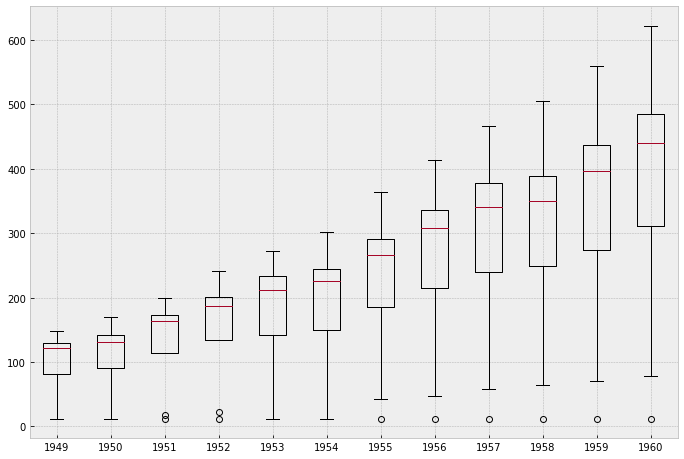

In [32]:
fig2 = plt.figure()

ax2 = fig2.add_axes([1.0,1.0,1.5,1.5])
ax2.boxplot(porAno)

ax2.set_xticks([i for i in range(13) if i != 0])
ax2.set_xticklabels([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbf82a2f60>,
      dtype=object)

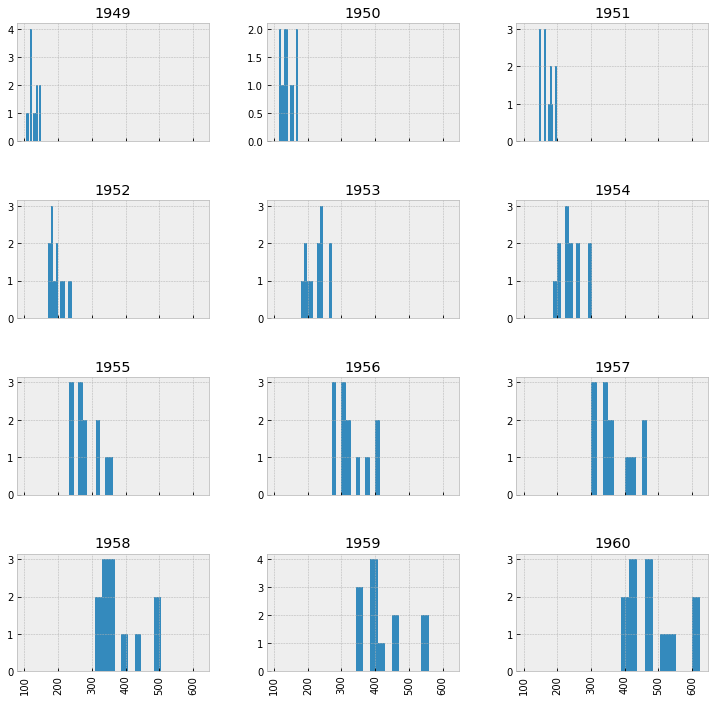

In [33]:
pas_cl.hist(column= '#Passengers', by= pas_cl['ano'], figsize= (12,12), sharex= True)

In [34]:
porMes = pas_cl.groupby(by = 'mes', sort = True).describe()
porMes

#Passengers                           ...       ano                 
          count        mean         std   ...       50%      75%     max
mes                                       ...                           
1          12.0  241.750000  101.032960   ...    1954.5  1957.25  1960.0
2          12.0  235.000000   89.619397   ...    1954.5  1957.25  1960.0
3          12.0  270.166667  100.559194   ...    1954.5  1957.25  1960.0
4          12.0  267.083333  107.374839   ...    1954.5  1957.25  1960.0
5          12.0  271.833333  114.739890   ...    1954.5  1957.25  1960.0
6          12.0  311.666667  134.219856   ...    1954.5  1957.25  1960.0
7          12.0  351.333333  156.827255   ...    1954.5  1957.25  1960.0
8          12.0  351.083333  155.783333   ...    1954.5  1957.25  1960.0
9          12.0  302.416667  123.954140   ...    1954.5  1957.25  1960.0
10         12.0  266.583333  110.744964   ...    1954.5  1957.25  1960.0
11         12.0  232.833333   95.185783   ...    1954.5  1957.25  1960.0
12         12.0  261.833333  103.093808   ...    1954.5  1957.25  1960.0

[12 rows x 16 columns]

<BarContainer object of 12 artists>

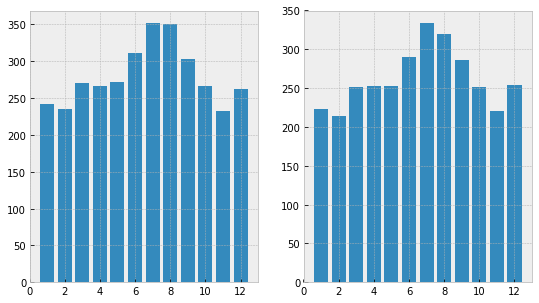

In [54]:
fig3 = plt.figure(figsize= (9,5))
ax3 = fig3.subplots(1,2)

ax3[0].bar(x= [i for i in range(13) if i != 0], height= porMes['#Passengers']['mean'])
ax3[1].bar(x= [i for i in range(13) if i != 0], height= porMes['#Passengers']['50%'])